In [1]:
%env OMP_NUM_THREADS=1
import gmsh
import firedrake as fd
import numpy as np
from scattering import *

env: OMP_NUM_THREADS=1


In [2]:
gmsh.initialize()

In [3]:
a0 = b0 = 3.0
a1 = b1 = 3.5
gmsh.model.geo.addPoint( a0, -b0, 0, 1.0,  1)
gmsh.model.geo.addPoint( a0,  b0, 0, 1.0,  2)
gmsh.model.geo.addPoint(-a0,  b0, 0, 1.0,  3)
gmsh.model.geo.addPoint(-a0, -b0, 0, 1.0,  4)
gmsh.model.geo.addPoint( a1, -b1, 0, 1.0,  5)
gmsh.model.geo.addPoint( a1, -b0, 0, 1.0,  6)
gmsh.model.geo.addPoint( a1,  b0, 0, 1.0,  7)
gmsh.model.geo.addPoint( a1,  b1, 0, 1.0,  8)
gmsh.model.geo.addPoint( a0,  b1, 0, 1.0,  9)
gmsh.model.geo.addPoint(-a0,  b1, 0, 1.0, 10)
gmsh.model.geo.addPoint(-a1,  b1, 0, 1.0, 11)
gmsh.model.geo.addPoint(-a1,  b0, 0, 1.0, 12)
gmsh.model.geo.addPoint(-a1, -b0, 0, 1.0, 13)
gmsh.model.geo.addPoint(-a1, -b1, 0, 1.0, 14)
gmsh.model.geo.addPoint(-a0, -b1, 0, 1.0, 15)
gmsh.model.geo.addPoint( a0, -b1, 0, 1.0, 16)

16

In [4]:
def add_point(t, k):
    x = np.cos(t) + 0.65 * np.cos(2 * t) - 0.65
    y = 1.5 * np.sin(t)
    gmsh.model.geo.addPoint(x, y, 0, 1.0, k)
    return k + 1

In [5]:
ts = np.linspace(0, 2 * np.pi, 50, endpoint=False)
kp_start = 17
kp = kp_start
for t in ts:
    kp = add_point(t, kp)
kp_end = kp

In [6]:
gmsh.model.geo.addLine( 1,  2,  1)
gmsh.model.geo.addLine( 2,  3,  2)
gmsh.model.geo.addLine( 3,  4,  3)
gmsh.model.geo.addLine( 4,  1,  4)
gmsh.model.geo.addLine( 6,  7,  5)
gmsh.model.geo.addLine( 9, 10,  6)
gmsh.model.geo.addLine(12, 13,  7)
gmsh.model.geo.addLine(15, 16,  8)
gmsh.model.geo.addLine( 2,  7,  9)
gmsh.model.geo.addLine( 7,  8, 10)
gmsh.model.geo.addLine( 8,  9, 11)
gmsh.model.geo.addLine( 9,  2, 12)
gmsh.model.geo.addLine( 3, 10, 13)
gmsh.model.geo.addLine(10, 11, 14)
gmsh.model.geo.addLine(11, 12, 15)
gmsh.model.geo.addLine(12,  3, 16)
gmsh.model.geo.addLine( 4, 13, 17)
gmsh.model.geo.addLine(13, 14, 18)
gmsh.model.geo.addLine(14, 15, 19)
gmsh.model.geo.addLine(15,  4, 20)
gmsh.model.geo.addLine( 1, 16, 21)
gmsh.model.geo.addLine(16,  5, 22)
gmsh.model.geo.addLine( 5,  6, 23)
gmsh.model.geo.addLine( 6,  1, 24)

24

In [7]:
kc_start = 25
kc = kc_start
for kp in range(kp_start, kp_end - 1):
    gmsh.model.geo.addLine(kp, kp + 1, kc)
    kc += 1
gmsh.model.geo.addLine(kp_end - 1, kp_start, kc)
kc_end = kc + 1

In [8]:
gmsh.model.geo.addCurveLoop(range(kc_start, kc_end), 1)
gmsh.model.geo.addCurveLoop(range(1, 5), 2)
gmsh.model.geo.addCurveLoop([5, -9, -1, -24], 3)
gmsh.model.geo.addCurveLoop([-12, 6, -13, -2], 4)
gmsh.model.geo.addCurveLoop([-3, -16, 7, -17], 5)
gmsh.model.geo.addCurveLoop([-21, -4, -20, 8], 6)
gmsh.model.geo.addCurveLoop(range(9, 13), 7)
gmsh.model.geo.addCurveLoop(range(13, 17), 8)
gmsh.model.geo.addCurveLoop(range(17, 21), 9)
gmsh.model.geo.addCurveLoop(range(21, 25), 10)

10

In [9]:
gmsh.model.geo.addPlaneSurface([1, 2], 1)
gmsh.model.geo.addPlaneSurface([3], 2)
gmsh.model.geo.addPlaneSurface([4], 3)
gmsh.model.geo.addPlaneSurface([5], 4)
gmsh.model.geo.addPlaneSurface([6], 5)
gmsh.model.geo.addPlaneSurface([7], 6)
gmsh.model.geo.addPlaneSurface([8], 7)
gmsh.model.geo.addPlaneSurface([9], 8)
gmsh.model.geo.addPlaneSurface([10], 9)

9

In [10]:
for kc in range(kc_start, kc_end):
    gmsh.model.geo.mesh.setTransfiniteCurve(kc, 2)

In [11]:
gmsh.model.geo.synchronize()

In [12]:
gmsh.model.addPhysicalGroup(
    1, range(kc_start, kc_end), 1, name="Gamma")
gmsh.model.addPhysicalGroup(
    1, range(1, 5), 2, name="Gamma_I")
gmsh.model.addPhysicalGroup(
    1, list(range(5, 9)) + [10, 11, 14, 15, 18, 19, 22, 23], 3, name="Gamma_D")

3

In [13]:
gmsh.model.addPhysicalGroup(2, [1], 1, name="Omega_F")
gmsh.model.addPhysicalGroup(2, [2, 4], 2, name="Omega_A_x")
gmsh.model.addPhysicalGroup(2, [3, 5], 3, name="Omega_A_y")
gmsh.model.addPhysicalGroup(2, range(6, 10), 4, name="Omega_A_xy")

4

In [14]:
gmsh.option.setNumber("Mesh.MeshSizeFactor", 0.25)
gmsh.model.mesh.generate(2)
gmsh.write("kite.msh")

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 20%] Meshing curve 9 (Line)
Info    : [ 20%] Meshing curve 10 (Line)
Info    : [ 20%] Meshing curve 11 (Line)
Info    : [ 20%] Meshing curve 12 (Line)
Info    : [ 20%] Meshing curve 13 (Line)
Info    : [ 20%] Meshing curve 14 (Line)
Info    : [ 20%] Meshing curve 15 (Line)
Info    : [ 30%] Meshing curve 16 (Line)
Info    : [ 30%] Meshing curve 17 (Line)
Info    : [ 30%] Meshing curve 18 (Line)
Info    : [ 30%] Meshing curve 19 (Line)
Info    : [ 30%] Meshing curve 20 (Line)
Info    : [ 30%] Meshing curve 21 (Line)
Info    : [ 30%] Meshing curve 22 (Line)
Info    : [ 30%] Meshing curve 23 (Line)
Info    : [ 40%] Meshing curve 24 (Line)
I

In [15]:
gmsh.finalize()

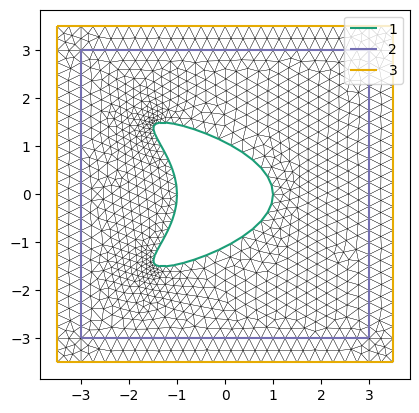

In [16]:
mesh = fd.Mesh("kite.msh")
plot_mesh(mesh)